<a href="https://colab.research.google.com/github/gxywang/py-visualization-tutorial/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPACT Python Data Visualization
Dataset: California Housing Prices by Google Colab
<br><br>
##Table of Contents
1. Data
2. Graphs

## Getting Started

Import libraries and refer to them by the given abbreviations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Read in the csv file as a pandas dataframe and display the first few rows.

Pandas dataframes are 2D data structures with labeled rows and columns, kinda like a spreadsheet.

In [ ]:
df = pd.read_csv("sample_data/california_housing_train.csv")
df.head() #displays only the first few rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


If you want to see more information, you can remove the .head() section and just use df.

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## 1.0 Data

The info method gives you information about the dataframe like number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column.

In [ ]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  

The isnull method checks if any of the values are null (NaN) and the sum method adds the number of null value cells per column. Typically, you want to replace null values with 0 so it doesn't mess up the rest of your stuff.

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

You can add a new column by setting it equal to an array with the right dimensions. You refer to each column of a dataframe by using `df["[column_name]"]`. In the example below, we are creating a new column called "non-bedrooms" and setting that equal to the total number of rooms minus the total number of bedrooms.

In [ ]:
df["non-bedrooms"] = df["total_rooms"]-df["total_bedrooms"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,non-bedrooms
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,4329.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,5749.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,546.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1164.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1128.0


You can remove a row or column by using the drop function. The first parameter is for the name of the row or column you are deleting. The second parameter refers to the axis: 0 for rows and 1 for columns.

In [ ]:
df = df.drop("non-bedrooms", 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## 2.0 Graphs

Now let's take a look at some graphs.

First, we should look at matplotlib. The command below gives us a list of all the preset themes. To see the color schemes, look [here](https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html).

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Now, let's make a scatter plot using a selected theme. The first input is the x-axis and the second is the y-axis. So in the example below, median_income is the x-values. Set the title using the title function.

<function matplotlib.pyplot.show>

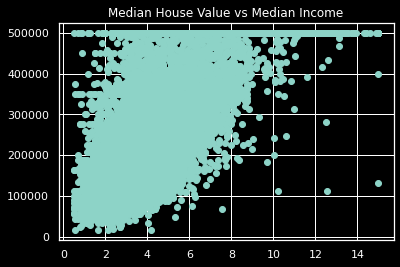

In [ ]:
with plt.style.context('dark_background'):
  plt.scatter(df['median_income'], df['median_house_value'])
  plt.title("Median House Value vs Median Income")

plt.show

If you only want to analyze one column, you can use index values (1,2,3...) instead of another column.

<function matplotlib.pyplot.show>

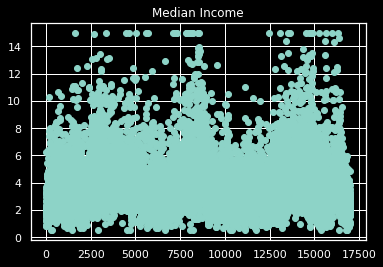

In [ ]:
with plt.style.context('dark_background'):
  plt.scatter(df.index.values, df['median_income'])
  plt.title("Median Income")

plt.show

There are more matplotlib graph types, which you can find [here](https://matplotlib.org/3.5.1/plot_types/index.html). But we'll move onto seaborn.

In [ ]:
sns.set()

The first seaborn plot we'll look at is the heatmap-- a data visualization technique that shows magnitude as a color scale. In the example below, the lighter the color the greater the values.

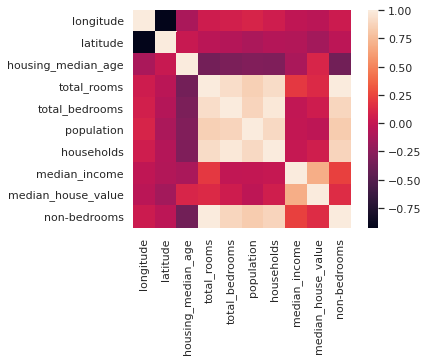

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, square = True)

The next plot is a distribution plot, used to compare range and distribution of data points. Typically for probability.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


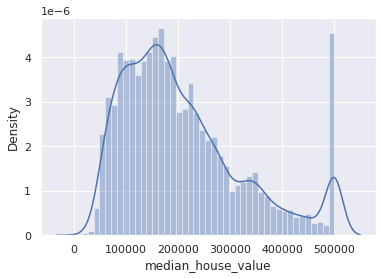

In [ ]:
sns.distplot(df['median_house_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


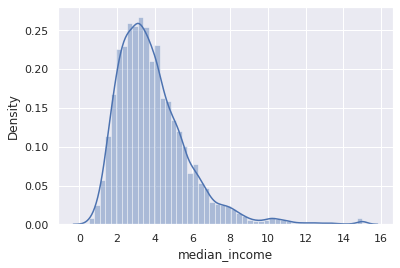

In [ ]:
sns.distplot(df['median_income'])

Next is the kernel density estimate (KDE) plot, used to analyze distribution--especially in multidimensions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


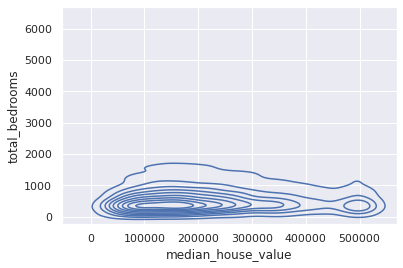

In [ ]:
x = df['median_house_value']
y = df['total_bedrooms']
sns.kdeplot(x, y);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


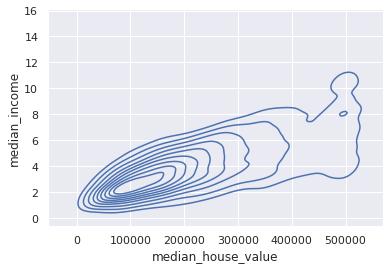

In [ ]:
x = df['median_house_value']
y = df['median_income']
sns.kdeplot(x, y);

Jointplots are used to draw one plot of two variables and one using one variable. In the example below, we use latitude and longitude as relational variables so the plotted points take the shape of California.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


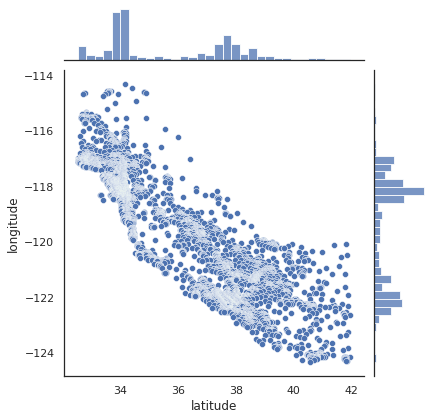

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(df['latitude'], df['longitude'], df['median_income'])

Finally, a pairgrid is a grid of graphs using the same plot type. It also displays all combinations of given columns, so you can compare graphs with their transposed counterparts (where x-y values are swapped).

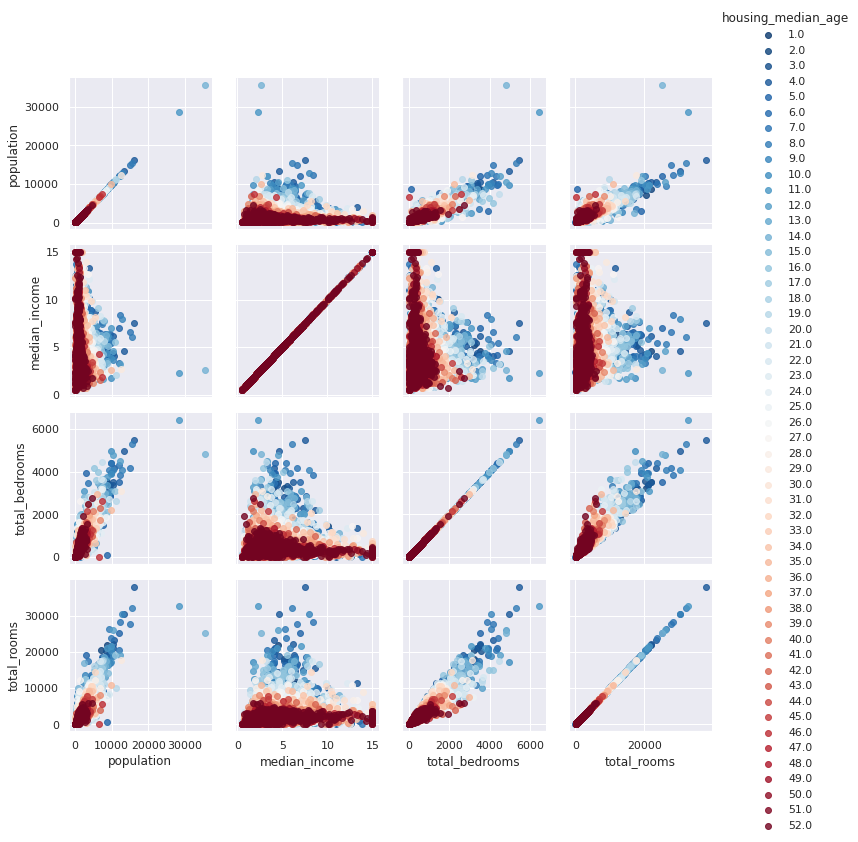

In [ ]:
g = sns.PairGrid(df, vars=['population', 'median_income', 'total_bedrooms', 'total_rooms'],
                 hue='housing_median_age', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

That's the end of this tutorial. Now try making your own!